## Import the libraries

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Import the Dataset

In [4]:
dataset=pd.read_csv('UsedAudi.csv')

In [5]:
dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


## Understanding The Dataset

In [6]:
dataset.shape

(10668, 9)

In [7]:
dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [8]:
dataset.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

## Slicing The Dataset

In [9]:
dataset = dataset.drop(['model','transmission','fuelType','tax','engineSize'],axis=1)

In [10]:
dataset.head()

,year,price,mileage,mpg
0,2017,12500,15735,55.4
1,2016,16500,36203,64.2
2,2016,11000,29946,55.4
3,2017,16800,25952,67.3
4,2019,17300,1998,49.6


## Segregate And Shape The Dataset

In [11]:
x=dataset.iloc[:,2].values.reshape(-1,1)

In [12]:
x.shape

(10668, 1)

In [13]:
x

array([[15735],
       [36203],
       [29946],
       ...,
       [  609],
       [ 8646],
       [11855]], dtype=int64)

In [14]:
y=dataset.iloc[:,-1].values.reshape(-1,1)

In [15]:
y.shape

(10668, 1)

In [16]:
y

array([[55.4],
       [64.2],
       [55.4],
       ...,
       [49.6],
       [47.9],
       [47.9]])

## Scatter Plot

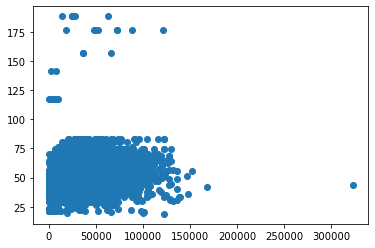

In [17]:
plt.scatter(x,y)
plt.show()

## Divide The Dataset Into Training And Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)           

In [20]:
x_train.shape

(8534, 1)

In [21]:
x_test.shape

(2134, 1)

In [22]:
y_train.shape

(8534, 1)

In [23]:
y_test.shape

(2134, 1)

# Perform Linear Regression

## Import The Function

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm= LinearRegression()

In [26]:
lm.fit(x_train,y_train)

LinearRegression()

## Predict The Price

In [27]:
y_pred=lm.predict(x_test)

In [28]:
y_pred

array([[57.35818347],
       [47.14316653],
       [46.21442915],
       ...,
       [49.17877328],
       [46.43151385],
       [54.38836846]])

## Visualize The Regression Line

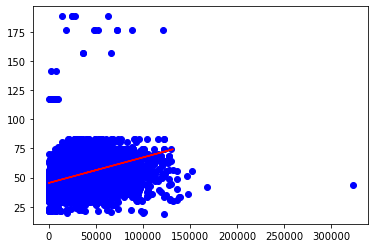

In [29]:
plt.scatter(x,y,color='blue')
plt.plot(x_test,y_pred,color='red')
plt.show()

## Final Check

In [30]:
check=pd.DataFrame(x_test,columns=['mpg'])

In [31]:
check['COA Actual']=y_test

In [32]:
check['COA Predicted']=y_pred

In [33]:
check

,mpg,COA Actual,COA Predicted
0,54654,55.4,57.358183
1,7975,39.2,47.143167
2,3731,39.8,46.214429
3,18478,43.5,49.441595
4,6207,34.5,46.756266
...,...,...,...
2129,20278,38.7,49.835498
2130,18668,49.6,49.483173
2131,17277,33.2,49.178773
2132,4723,34.9,46.431514
